# Priorbox test

Create anchorboxes for a 300x300 image, and visualize them

## Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
np.random.seed(seed=0)

from utils import create_scales

## Constants

In [2]:
ASPECT_RATIOS = [1.0, 2.0, 3.0, 1.0/2, 1.0/3]
MAX_SCALE = 0.9
MIN_SCALE = 0.2
NUM_SCALES = 6
IMG_SIZE = 300
IMG_PATH = 'image/sample.png'

## Load, rescale image

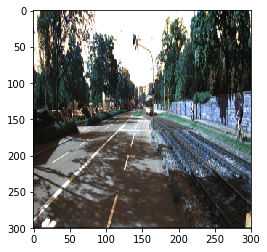

In [3]:
img = cv2.imread(IMG_PATH)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(img)
plt.show()

In [16]:
def get_single_anchor_box(i, j, scale, aspect_ratio, feature_map_width):
    box_width = scale * np.sqrt(aspect_ratio)
    box_height = scale / np.sqrt(aspect_ratio)
    center = ((i + 0.5)/feature_map_width, (j + 0.5)/feature_map_width)
    upper_left = (center[0] - box_width/2, center[1] - box_height/2)
    lower_right = (center[0] + box_width/2, center[1] + box_height/2)
    anchor = np.array([center[0], center[1], box_width, box_height])
    x = np.array([upper_left[0], upper_left[0], lower_right[0], lower_right[0], upper_left[0]]) * IMG_SIZE
    y = np.array([upper_left[1], lower_right[1], lower_right[1], upper_left[1], upper_left[1]]) * IMG_SIZE
    return anchor, x, y


def create_anchor_boxes(aspect_ratios=[1.0], scales=[0.2]):
    anchors = []
    for scale in scales:
        feature_map_width = int(1.0 / scale)
        plt.imshow(img)
        for i in range(feature_map_width):
            for j in range(feature_map_width):
                for aspect_ratio in aspect_ratios:
                    anchor, x, y = get_single_anchor_box(i, j, scale, aspect_ratio, feature_map_width)
                    anchors.append(anchor)
                    plt.plot(x, y, 'ro-', linewidth=1)
                #TODO: +1 aspect ratio
        plt.show()
    return anchors

## Create anchor boxes, and visualize

In [ ]:
create_anchor_boxes(aspect_ratios=[1.0])

## Create anchor boxes with different aspect ratio

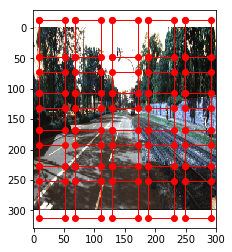

[array([ 0.02928932, -0.04142136,  0.17071068,  0.24142136]),
 array([0.02928932, 0.15857864, 0.17071068, 0.44142136]),
 array([0.02928932, 0.35857864, 0.17071068, 0.64142136]),
 array([0.02928932, 0.55857864, 0.17071068, 0.84142136]),
 array([0.02928932, 0.75857864, 0.17071068, 1.04142136]),
 array([ 0.22928932, -0.04142136,  0.37071068,  0.24142136]),
 array([0.22928932, 0.15857864, 0.37071068, 0.44142136]),
 array([0.22928932, 0.35857864, 0.37071068, 0.64142136]),
 array([0.22928932, 0.55857864, 0.37071068, 0.84142136]),
 array([0.22928932, 0.75857864, 0.37071068, 1.04142136]),
 array([ 0.42928932, -0.04142136,  0.57071068,  0.24142136]),
 array([0.42928932, 0.15857864, 0.57071068, 0.44142136]),
 array([0.42928932, 0.35857864, 0.57071068, 0.64142136]),
 array([0.42928932, 0.55857864, 0.57071068, 0.84142136]),
 array([0.42928932, 0.75857864, 0.57071068, 1.04142136]),
 array([ 0.62928932, -0.04142136,  0.77071068,  0.24142136]),
 array([0.62928932, 0.15857864, 0.77071068, 0.44142136])

In [18]:
create_anchor_boxes(aspect_ratios=[0.5])

## Create anchor boxes with different scale

In [ ]:
create_anchor_boxes(scales=[0.5])

## Create anchor boxes, parameterize number of features

TODO